In [4]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/Rohanrathod7/my-ds-projects/main/02_data_manipulation/hr_data_joining/Data/employees.csv"

emp  = pd.read_csv(url, parse_dates=["HireDate"])
print(emp .head())

   EmployeeID                 Name Department                JobRole  \
0           1          Maria Moore      Sales        Sales Executive   
1           2       Jennifer Hodge      Sales        Sales Executive   
2           3      Catherine Blair        R&D     Research Scientist   
3           4      Matthew Hawkins        R&D  Laboratory Technician   
4           5  Jonathan Fitzgerald    Finance             Accountant   

    HireDate  MonthlyIncome  PerformanceRating  PercentSalaryHike  \
0 2022-02-19          15149                  3                 17   
1 2015-11-23          12674                  4                 11   
2 2017-02-18          11279                  1                 16   
3 2017-02-24          12654                  3                 10   
4 2021-12-02           7552                  2                 16   

   YearsAtCompany  TrainingTimesLastYear Attrition  
0               3                      1       Yes  
1               9                      0      

### Simulate Performance Reviews

In [7]:
np.random.seed(1)
emps = emp['EmployeeID']
quarters = pd.period_range('2023Q1', '2024Q2', freq='Q')
data = []
for eid in emps:
    for q in quarters:
        data.append({
            'EmployeeID': eid,
            'ReviewQuarter': q,
            'PerfScore': np.random.randint(1, 5),
            'Promoted': np.random.choice([0,1], p=[0.90,0.10])
        })
reviews = pd.DataFrame(data)
print(reviews.head())


   EmployeeID ReviewQuarter  PerfScore  Promoted
0           1        2023Q1          2         1
1           1        2023Q2          1         0
2           1        2023Q3          4         1
3           1        2023Q4          1         0
4           1        2024Q1          1         0


In [12]:
df = emp.merge(reviews, on='EmployeeID', how='left')        # Left Join
inner = emp.merge(reviews, on='EmployeeID')                 # Inner Join
semi = emp[emp['EmployeeID'].isin(reviews['EmployeeID'])]  # Semi-Join
anti = emp[~emp['EmployeeID'].isin(reviews['EmployeeID'])] # Anti-Join
print(df.head(10))


   EmployeeID            Name Department          JobRole   HireDate  \
0           1     Maria Moore      Sales  Sales Executive 2022-02-19   
1           1     Maria Moore      Sales  Sales Executive 2022-02-19   
2           1     Maria Moore      Sales  Sales Executive 2022-02-19   
3           1     Maria Moore      Sales  Sales Executive 2022-02-19   
4           1     Maria Moore      Sales  Sales Executive 2022-02-19   
5           1     Maria Moore      Sales  Sales Executive 2022-02-19   
6           2  Jennifer Hodge      Sales  Sales Executive 2015-11-23   
7           2  Jennifer Hodge      Sales  Sales Executive 2015-11-23   
8           2  Jennifer Hodge      Sales  Sales Executive 2015-11-23   
9           2  Jennifer Hodge      Sales  Sales Executive 2015-11-23   

   MonthlyIncome  PerformanceRating  PercentSalaryHike  YearsAtCompany  \
0          15149                  3                 17               3   
1          15149                  3                 17     

In [14]:
dup_ids = emp['EmployeeID'][df['EmployeeID'].duplicated()]
print("Duplicates in EmployeeID:", dup_ids.tolist())


Duplicates in EmployeeID: [2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 20, 21, 22, 23, 24, 26, 27, 28, 29, 30, 32, 33, 34, 35, 36, 38, 39, 40, 41, 42, 44, 45, 46, 47, 48, 50, 51, 52, 53, 54, 56, 57, 58, 59, 60, 62, 63, 64, 65, 66, 68, 69, 70, 71, 72, 74, 75, 76, 77, 78, 80, 81, 82, 83, 84, 86, 87, 88, 89, 90, 92, 93, 94, 95, 96, 98, 99, 100, 101, 102, 104, 105, 106, 107, 108, 110, 111, 112, 113, 114, 116, 117, 118, 119, 120, 122, 123, 124, 125, 126, 128, 129, 130, 131, 132, 134, 135, 136, 137, 138, 140, 141, 142, 143, 144, 146, 147, 148, 149, 150, 152, 153, 154, 155, 156, 158, 159, 160, 161, 162, 164, 165, 166, 167, 168, 170, 171, 172, 173, 174, 176, 177, 178, 179, 180, 182, 183, 184, 185, 186, 188, 189, 190, 191, 192, 194, 195, 196, 197, 198, 200]


In [19]:
df_sorted = emp[['EmployeeID','HireDate']].sort_values(['HireDate'])
rev_dates = reviews.assign(Date=reviews['ReviewQuarter'].dt.to_timestamp()).sort_values(['Date'])
asof_merged = pd.merge_asof(df_sorted, rev_dates, left_on='HireDate', right_on='Date', by='EmployeeID')
print(asof_merged.head(10))

   EmployeeID   HireDate ReviewQuarter  PerfScore  Promoted Date
0          52 2015-08-14           NaT        NaN       NaN  NaT
1           7 2015-08-31           NaT        NaN       NaN  NaT
2         139 2015-10-06           NaT        NaN       NaN  NaT
3         123 2015-10-12           NaT        NaN       NaN  NaT
4          47 2015-10-14           NaT        NaN       NaN  NaT
5          88 2015-10-20           NaT        NaN       NaN  NaT
6          89 2015-11-08           NaT        NaN       NaN  NaT
7           2 2015-11-23           NaT        NaN       NaN  NaT
8         108 2015-12-03           NaT        NaN       NaN  NaT
9          25 2015-12-09           NaT        NaN       NaN  NaT


In [20]:
df = df.sort_values(['Department','PerfScore'], ascending=[True, False])
df['YearsAtCompany'] = (pd.Timestamp.today() - df['HireDate']).dt.days / 365


In [21]:
salary_stats = df.groupby('Department')['MonthlyIncome'].agg(['mean','min','max','count'])
pivot_perf = df.pivot_table(index='Department', columns='ReviewQuarter', values='PerfScore', aggfunc='mean')


In [22]:
emp.describe(include='all')
high_earners = df.query('MonthlyIncome > 8000')
melted = df.melt(id_vars=['EmployeeID','Department'], value_vars=['PerfScore','MonthlyIncome'],
                 var_name='Metric', value_name='Value')


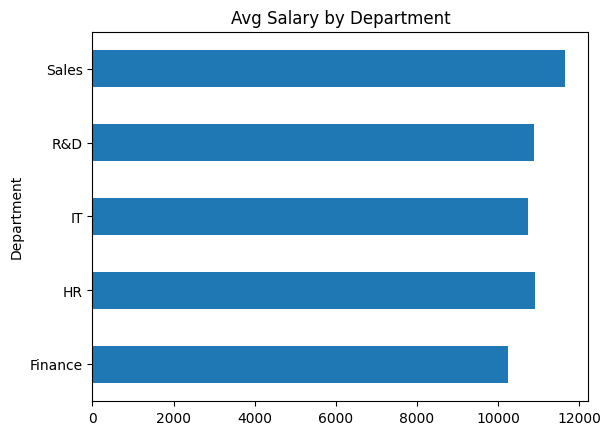

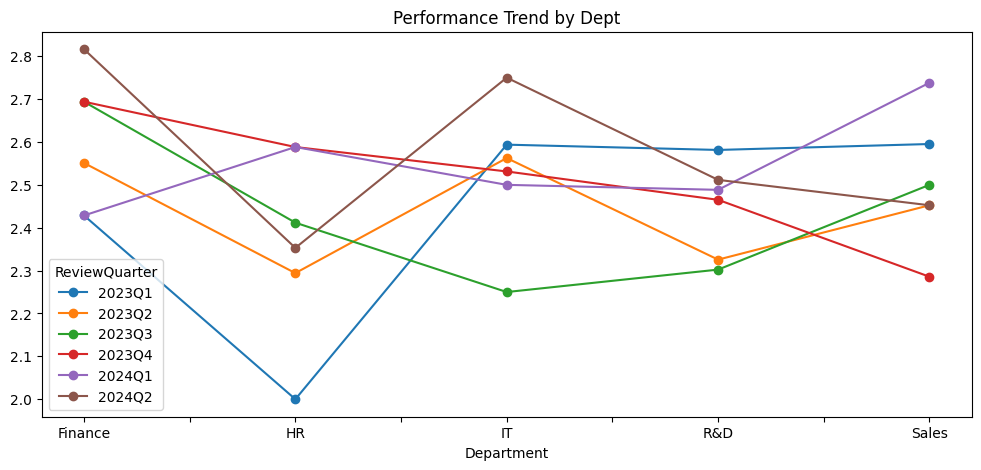

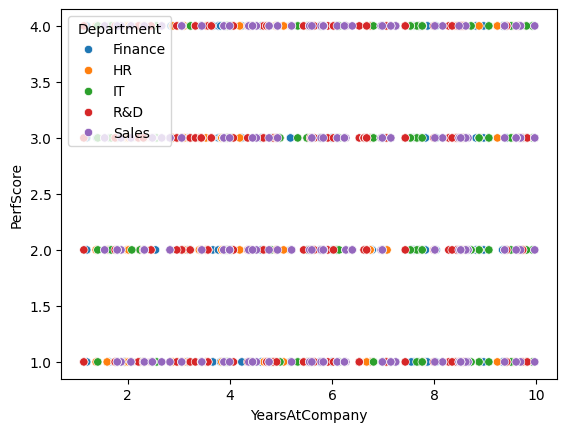

In [23]:
salary_stats['mean'].plot(kind='barh', title='Avg Salary by Department'); plt.show()
pivot_perf.plot(marker='o', figsize=(12,5), title='Performance Trend by Dept'); plt.show()
sns.scatterplot(data=df, x='YearsAtCompany', y='PerfScore', hue='Department'); plt.show()
